In [26]:
import pandas as pd
import gffpandas.gffpandas as gffpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram


snp_df = pd.read_csv("../data/SNP_variant_data.csv")
bg_tpm_df = pd.read_csv("../data/bg_tpm_df.csv")
amyg_tpm_df = pd.read_csv("../data/amyg_tpm_df.csv")
fc_tpm_df = pd.read_csv("../data/fc_tpm_df.csv")
skel_tpm_df = pd.read_csv("../data/skeletal_muscle.csv")
#annotations = gffpd.read_gff3('../data/GRCh38_latest_genomic.gff')



In [27]:
snp_df['Variant_Risk_Allele'] = snp_df['Variant and risk allele'].str.split('-').str[0]
snp_df = snp_df.drop(columns="Variant and risk allele", axis =1)
snp_df = snp_df.reindex(columns=['Variant_Risk_Allele', 'Location', 'Mapped gene', 'Trait(s)', 'Reported trait', 'Study accession'])
snp_df.drop(snp_df.loc[snp_df['Location']=="Mapping not available"].index, inplace=True)
snp_df['chromosome'] = snp_df.apply(lambda row: row['Location'].split(":")[0], axis=1)
snp_df['position'] = snp_df.apply(lambda row: row['Location'].split(":")[1], axis=1)

In [28]:
# best_ref_df = annotations.df.loc[annotations.df['source'] == "BestRefSeq"]

In [29]:
# gene_exon_df = best_ref_df[best_ref_df['attributes'].astype(str).str.contains("ID=gene|ID=exon")]

In [30]:
# pd.options.mode.chained_assignment = None
# gene_exon_df['attributes_id'] = gene_exon_df.apply(lambda row: row['attributes'].split(";")[0].split("-")[0][3:], axis=1)
# pd.options.mode.chained_assignment = 'warn'

In [31]:
# gene_exon_df[gene_exon_df['attributes'] == "ID=gene-ATP5MF-PTCD1;Dbxref=GeneID:100526740,HGNC:HGNC:38844;Name=ATP5MF-PTCD1;description=ATP5MF-PTCD1 readthrough;gbkey=Gene;gene=ATP5MF-PTCD1;gene_biotype=protein_coding;gene_synonym=ATP5J2-PTCD1"]

In [32]:
dfs = {
    "bg_df": bg_tpm_df,
    "fc_df": fc_tpm_df,
    "amyg_df": amyg_tpm_df,
    "skel_df": skel_tpm_df
}
cluster_mapping = {
    "bg_df": {},
    "fc_df": {},
    "amyg_df": {},
    "skel_df": {}
}

In [33]:
# Add Variance

for df in dfs.keys():
    important_cols_df = dfs[df].drop(['id', 'Name', 'Description'], axis=1)
    dfs[df]['variance'] = important_cols_df.var(axis=1)


In [34]:
# Trim tpm_df to high variance rows
trim_value = 10000

for df in dfs.keys():
    dfs[df] = dfs[df].sort_values(by='variance', ascending=False)
    dfs[df] = dfs[df].head(trim_value)
    dfs[df] = dfs[df].reset_index(drop=True)


In [35]:
dfs['bg_df']

,id,Name,Description,GTEX.1192X.0011.R7b.SM.DNZZC,GTEX.11DXW.0011.R7b.SM.DO119,GTEX.11DXY.0011.R7a.SM.DO11L,GTEX.11DYG.0011.R7b.SM.EXUS6,GTEX.11DZ1.0011.R7a.SM.DNZZH,GTEX.11GSP.0011.R7b.SM.57WC3,GTEX.11NUK.0011.R7a.SM.DO93P,...,GTEX.ZDXO.0011.R7a.SM.4WWCU,GTEX.ZE7O.0011.R7a.SM.57WCU,GTEX.ZE9C.0011.R7a.SM.4WWCX,GTEX.ZF28.0011.R7a.SM.4WKF5,GTEX.ZUA1.0011.R7b.SM.4YCDP,GTEX.ZV68.0011.R7a.SM.51MT4,GTEX.ZVT3.0011.R7a.SM.57WCO,GTEX.ZVZQ.0011.R7b.SM.57WBB,GTEX.ZXG5.0011.R7b.SM.57WCC,variance
0,56178,ENSG00000198804.2,MT-CO1,41160.000,99870.000,37720.000,33050.000,32320.000,42060.000,72200.000,...,86740.000,71990.000,41260.000,79310.000,29900.000,83780.000,84420.000,41340.000,69020.000,4.737179e+08
1,56166,ENSG00000210082.2,MT-RNR2,77450.000,83890.000,72770.000,78890.000,133400.000,88370.000,79400.000,...,97970.000,130500.000,111500.000,124700.000,60720.000,127900.000,102100.000,78110.000,101300.000,3.969104e+08
2,56181,ENSG00000198712.1,MT-CO2,70890.000,91840.000,84900.000,75120.000,68480.000,66290.000,87340.000,...,93900.000,76410.000,80850.000,91260.000,68520.000,94230.000,94390.000,63300.000,88940.000,1.746999e+08
3,56190,ENSG00000198886.2,MT-ND4,48420.000,68670.000,48750.000,44950.000,44720.000,47520.000,55440.000,...,67280.000,72360.000,57970.000,72350.000,50220.000,69190.000,77450.000,45820.000,62530.000,1.467018e+08
4,56184,ENSG00000198899.2,MT-ATP6,60400.000,77120.000,68290.000,46950.000,53270.000,65410.000,65010.000,...,79280.000,69440.000,66140.000,74640.000,67960.000,82480.000,89490.000,60210.000,82040.000,1.168294e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2952,ENSG00000182134.15,TDRKH,5.454,2.138,4.721,5.206,4.928,6.162,3.727,...,2.231,2.563,3.537,2.204,7.505,1.360,1.136,7.874,2.993,5.088992e+00
9996,38233,ENSG00000182218.9,HHIPL1,9.025,5.393,6.499,9.284,8.355,10.300,9.130,...,8.910,5.393,10.280,4.995,8.589,4.959,4.348,5.868,3.510,5.081339e+00
9997,7109,ENSG00000163083.5,INHBB,7.672,2.801,4.373,2.966,5.165,6.967,6.201,...,4.075,3.009,9.638,5.333,5.681,3.614,2.917,3.386,3.481,5.079450e+00
9998,1986,ENSG00000117174.10,ZNHIT6,7.626,3.855,6.416,5.537,6.143,7.124,5.526,...,4.687,5.418,5.768,3.968,7.393,3.255,2.941,15.790,5.810,5.077262e+00


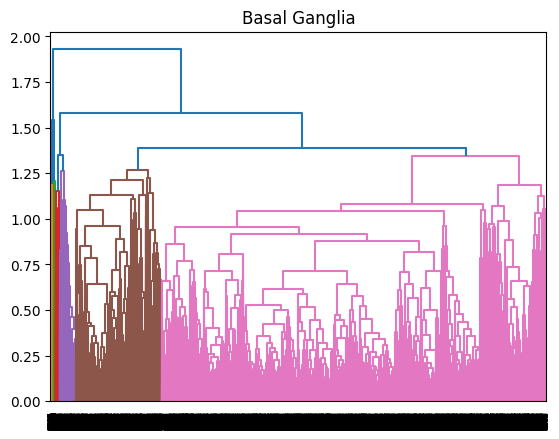

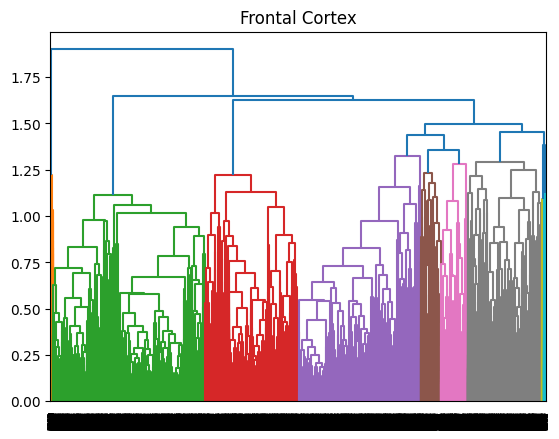

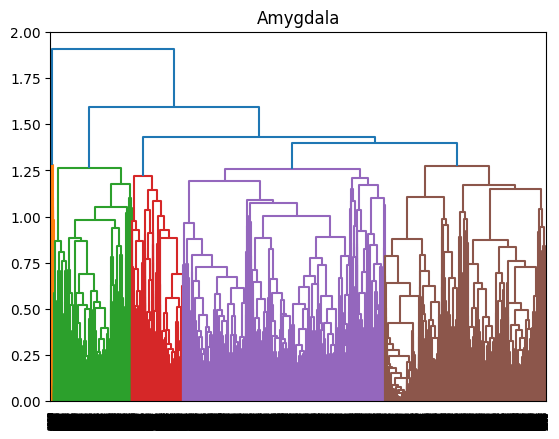

In [ ]:
###############################
#   Hierarchical clustering   #
###############################

num_clusters = 200

for df in dfs.keys():  
    cluster_df = dfs[df]
    dropped_cols = cluster_df[['id', 'Name', 'Description', 'variance']]
    cluster_df = cluster_df.drop(['id', 'Name', 'Description', 'variance'], axis=1)

    #distance_matrix = linkage(cluster_df, method = 'ward', metric = 'euclidean')
    #distance_matrix = linkage(cluster_df, method = 'complete', metric = 'correlation')
    distance_matrix = linkage(cluster_df, method = 'complete', metric = 'correlation')
    dn = dendrogram(distance_matrix)
    # Display the dendogram
    title = ""
    if df == "bg_df":
        title = "Basal Ganglia"
    elif df == "fc_df":
        title = "Frontal Cortex"
    elif df == "amyg_df":
        title = "Amygdala"
    elif df == "skel_df":
        title = "Skeletal Muscle"
    else:
        print("DF Unknown")
    plt.title(title)
    plt.show()
    
    cluster_df['cluster_labels'] = fcluster(distance_matrix, num_clusters, criterion='maxclust')
    dfs[df] = pd.concat([dropped_cols, cluster_df], axis=1)
    





In [ ]:
# https://predictivehacks.com/hierarchical-clustering-in-python/

In [ ]:
# Gathers genes related to "alcohol dependence"
mask = snp_df['Trait(s)'].str.contains("alcohol dependence")
#mask = snp_df['Trait(s)'].str.contains("opioid dependence")
#mask = snp_df['Trait(s)'].str.contains("nicotine dependence")
interested_df = snp_df[mask]
interested_genes = interested_df['Mapped gene']
interested_genes_filtered = []
for gene in interested_genes:
    genes = gene.split(",")
    for elm in genes:
        if elm != "'-":
            interested_genes_filtered.append(elm.replace(" ", ""))
interested_genes_filtered = list(set(interested_genes_filtered))

In [ ]:
snp_df['Trait(s)'].unique()

In [ ]:
cluster_data = {
    "bg_df": [([],i+1,[]) for i in range (num_clusters)],
    "fc_df": [([],i+1,[]) for i in range (num_clusters)],
    "amyg_df": [([],i+1,[]) for i in range (num_clusters)],
    "skel_df": [([],i+1,[]) for i in range (num_clusters)]
}

# All of the below is just for the amyg tissue data
for df in dfs.keys():
    cluster_counts = [0] * num_clusters
    count = 0

    for i in range (len (dfs[df])):
        clust_lab = dfs[df]['cluster_labels'][i]    
        cluster_counts [clust_lab-1] += 1
        cluster_data[df][clust_lab-1][0].append(dfs[df]['Description'][i])
        cluster_data[df][clust_lab-1][2].append(dfs[df]['Name'][i])
    #print(dfs[df]['Name'])
    
    print (f"Cluster count ({df}):", num_clusters)
    print (f"Clusters ({df}):", cluster_counts)
    print (f"Mean cluster pop ({df}):", sum (cluster_counts) / len (cluster_counts))
    print ("===================================================================\n")

In [ ]:
print("############################")
print("#     Alcohol Dependence   #")
print("############################\n\n")

print ("\nNumber of interesting genes in total:", len(interested_genes_filtered), "\n\n\n")
interesting_genes_set = set (interested_genes_filtered)
    
for df in dfs.keys():
    intersects = []
    max_cluster = {
        "idx":-1,
        "counts": -1
    }
    for (desc, lab, name) in cluster_data[df]:
        inter = list (interesting_genes_set.intersection (desc))
        intersects.append ((inter, lab, len(desc)))
        if len(desc) > max_cluster["counts"]:
            max_cluster['idx'] = lab
            max_cluster['counts'] = len(desc)        

        
    intersects.sort(key = lambda pair: len(pair[0]), reverse = True)
    # each element of `intersects` is a pair `(inter_genes,lab)` where `inter_genes` is all of the genes 
    # from cluster `lab` that were in the `interesting_genes_filtered` list
    # `intersects[0]` represents the cluster with the highest intersection between its genes and the interesting ones
    
    title = ""
    if df == "bg_df":
        title = "Basal Ganglia"
    elif df == "fc_df":
        title = "Frontal Cortex"
    elif df == "amyg_df":
        title = "Amygdala"
    elif df == "skel_df":
        title = "Skeletal Muscle"
    else:
        print("DF Unknown")
    print(f"=================================  {title}  ========================================")
    print(f"Cluster {intersects[0][1]} had the most intersections with the interesting genes set.\n")
    print(f"The intersecting genes are: \n{intersects[0][0]}\n")
    print(f"Cluster {intersects[0][1]} had {intersects[0][2]} genes in the cluster.\n")
    print(f"Highest numbers of interesting genes in the top 5 clusters ({df}):", [len(inter[0]) for inter in intersects[:5]])
    print(f"MAX Cluster {max_cluster['idx']} with {max_cluster['counts']} genes.")
    print("\n")


In [ ]:
data = []
for df in dfs.keys():
    intersects = []
    for (desc, lab, name) in cluster_data[df]:
        inter = list (interesting_genes_set.intersection (desc))
        intersects.append ((inter, lab, len(desc), desc))
        if len(desc) > max_cluster["counts"]:
            max_cluster['idx'] = lab
            max_cluster['counts'] = len(desc)
    intersects.sort(key = lambda pair: len(pair[0]), reverse = True)

    
    title = ""
    if df == "bg_df":
        title = "Basal Ganglia"
    elif df == "fc_df":
        title = "Frontal Cortex"
    elif df == "amyg_df":
        title = "Amygdala"
    elif df == "skel_df":
        title = "Skeletal Muscle"
    else:
        print("DF Unknown")
    print(f"=================================  {title}  ========================================")
    data.append(intersects[0][3])
    for gene in intersects[0][3]:
        #print(gene)
        continue
    print("\n")
    
    # bar graphs - code ripped from https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/#
    
    keep = list (filter (lambda inter: len(inter[0])>0, intersects))
    
    totals = [inter[2] for inter in keep]
    interestings = [len(inter[0]) for inter in keep]
    labs = [str(inter[1]) for inter in keep]
    
    X_axis = np.arange(len(labs))
  
    #plt.bar(X_axis - 0.2, totals, 0.4, label = 'Total')
    plt.bar(X_axis - 0.6, interestings, label = 'Interesting')

    plt.xticks(X_axis, labs, rotation=90, ha='right')
    plt.xlabel("Cluster IDs")
    plt.ylabel("Number of genes")
    plt.title("Number interesting genes in clusters for " + title)
    #plt.legend()
    plt.show()
    plt.clf()
    

In [ ]:
common_elements = set(data[0]).intersection(data[1], data[2])
print(list(common_elements))

In [ ]:
list(dfs.keys())